<a href="https://colab.research.google.com/github/demiranda-gabriel/nequip-tutorial/blob/main/NequIP_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title Introduction
%%html
<!-- Banner -->
<div style="background-color:#DCE9F8; border-radius:10px; padding:20px; display:flex; align-items:center; justify-content:space-between; margin-bottom:20px;">

  <!-- Centered Title -->
  <div style="flex:1; text-align:center;">
    <h1 style="margin:0; font-size:7rem; color:#1E4D9D;">NequIP Tutorial</h1>
  </div>

  <!-- Right-aligned Logo -->
  <div style="flex:1; text-align:center;">
    <img src="https://github.com/mir-group/nequip/blob/main/logo.png?raw=true" style="width:300px;">
  </div>
</div>

<!-- Tutorial Introduction -->
<div style="background-color:#ffffff; border-left:0px solid #3C82E3; border-radius:10px; padding:0px; font-size:1.1rem; color:#1E4D9D; margin-bottom:20px;">
  <h2 style="margin-top:0; font-size:2rem; color:#3C82E3;">Introduction</h2>
  <p>This is a tutorial for <b><code>NequIP</code></b>, an architecture for building highly accurate and scalable Machine Learning Interatomic Potentials (MLIPs) and deploy them in production simulations. The ideas are described <a href="https://arxiv.org/abs/2204.05249" target="_blank" style="color:#3C82E3; text-decoration:none;">in this paper</a> while the latest framework is detailed <a href="https://arxiv.org/abs/2504.16068" target="_blank" style="color:#3C82E3; text-decoration:none;">in this paper</a>. We have released an <a href="https://github.com/mir-group/nequip" target="_blank" style="color:#3C82E3; text-decoration:none;">open-source package</a> implementing <b><code>NequIP</code></b>. This tutorial serves as a simple introduction to the <b><code>NequIP</code></b> code. For more information, check out our <a href="https://nequip.readthedocs.io/en/latest/" target="_blank" style="color:#3C82E3; text-decoration:none;">extensive documentation here</a>. </p>
  <p> You will never have to write a single line of Python. Instead, you can train a network with a single command and use it to run Molecular Dynamics (MD) in <b><code>LAMMPS</code></b> or <b><code>ASE</code></b>.</p>
  <p>If you need to customize it to your needs, the code is modular and flexible under the hood.</p>
</div>

<!-- Contents Section -->
<div style="background-color:#ffffff; border-left:0px solid #3C82E3; border-radius:10px; padding:0px; margin-bottom:20px;">
  <h2 style="margin-top:0; font-size:2rem; color:#3C82E3;">Contents</h2>
  <p style="font-size:1.1rem; color:#1E4D9D;">
    This tutorial will teach you how to:
  </p>
  <ul style="list-style:disc; padding-left:20px; font-size:1.1rem; color:#1E4D9D;">
    <li style="margin-bottom:10px;">
        <b>Train</b>: Train the neural network using your dataset to learn interatomic potentials.
    </li>
    <li style="margin-bottom:10px;">
        <b>Deploy</b>: Convert the Python-based model into a stand-alone potential file optimized for fast execution.
    </li>
    <li style="margin-bottom:10px;">
        <b>Run</b>: Use the trained model to perform tasks such as MD, Monte Carlo simulations, or Structural Minimization in <b><code>LAMMPS</code></b>.
    </li>
    <!-- <li style="margin-bottom:10px;">
        <b>(Optional) Extend the model with custom code</b>
    </li> -->
</ul>

  <p style="font-size:1.1rem; color:#1E4D9D;">
    Everything will happen in this Colab, including running <code><b>LAMMPS</b></code>. Training and inference will take only about 10 minutes. Before you get started, however, you will have to compile <code><b>LAMMPS</b></code> which takes <b>approximately 8 minutes</b>. Once we have installed the <b><code>NequIP</code></b> and <code><b>LAMMPS</b></code> code, we're ready to get started.
  </p>
</div>


In [ ]:
# @title Setup and Installation
%%html
<div style="background-color:#ffffff; border-left: 0px solid #3C82E3; border-radius: 5px; padding: 0px; margin-bottom: 20px; font-size: 1.1rem; color:#333;">

  <!-- Title -->
  <h2 style="margin-top: 0; font-size: 2rem; color: #3C82E3;">⚙️ Setup and Installation</h2>

  <!-- Introduction -->
  <p style="margin-bottom: 10px;">
    The following tools will be installed to ensure smooth operation of the tutorial, this will take about 8 minutes:
  </p>

  <!-- List of Tools -->
  <ul style="list-style: disc; padding-left: 10px;">
    <li style="margin-bottom: 5px;"><b>NequIP</b></li>
    <li style="margin-bottom: 5px;"><b>pair-nequip</b></li>
    <li style="margin-bottom: 5px;"><b>LAMMPS</b></li>
  </ul>
</div>


<div style="
    background-color:#FFECEC;
    border-left: 5px solid #D9534F;
    border-radius: 5px;
    padding: 15px;
    font-size: 1.2rem;
    color:#D9534F;
    margin-bottom: 20px;">

  <p style="margin: 0; font-weight: bold;">
    <span style="font-size: 1.4rem;"> ⚠ Confirm Device is <b>GPU</b> ⚠ </span>
  </p>
  <p style="margin-top: 10px; font-size: 1.1rem; color:#333;">
    Before you get started, make sure that in your menu bar: <br>
    <b>Runtime</b> → <b>Change runtime type</b> is set to <b>GPU</b>.
  </p>
</div>

In [ ]:
## INSTALL NEQUIP ##
!pip install nequip==0.16.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.4/284.4 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 450.1/450.1 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 846.0/846.0 kB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.4/299.4 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 453.1/453.1 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.5/849.5 kB 25.8 MB/s eta 0:00:00


In [ ]:
## INSTALL PAIR NEQUIP ##
!git clone https://github.com/mir-group/pair_nequip_allegro.git

## INSTALL LAMMPS ##
!rm -rf /content/lammps
!git clone --depth=1 https://github.com/lammps/lammps

# patch lammps
!cd pair_nequip_allegro && bash patch_lammps.sh ../lammps/

# build lammps
!cd lammps && rm -rf build && mkdir build && cd build && cmake ../cmake -DCMAKE_PREFIX_PATH=`python -c 'import torch;print(torch.utils.cmake_prefix_path)'` -DNEQUIP_AOT_COMPILE=ON -DMKL_INCLUDE_DIR=/tmp && make -j$(nproc)

Cloning into 'pair_nequip_allegro'...
remote: Enumerating objects: 634, done.
remote: Counting objects: 100% (207/207), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 634 (delta 155), reused 152 (delta 134), pack-reused 427 (from 1)
Receiving objects: 100% (634/634), 329.09 KiB | 2.37 MiB/s, done.
Resolving deltas: 100% (359/359), done.
Cloning into 'lammps'...
remote: Enumerating objects: 13655, done.
remote: Counting objects: 100% (13655/13655), done.
remote: Compressing objects: 100% (9889/9889), done.
remote: Total 13655 (delta 4810), reused 7278 (delta 3545), pack-reused 0 (from 0)
Receiving objects: 100% (13655/13655), 134.11 MiB | 19.20 MiB/s, done.
Resolving deltas: 100% (4810/4810), done.
Updating files: 100% (13084/13084), done.
Copying files...
Updating CMakeLists.txt...
Done!
CMake Deprecation Warning at CMakeLists.txt:22 (cmake_policy):
  The OLD behavior for policy CMP0109 will be removed from a future version
  of CMake.

  The cmake-policies(7) man

In [ ]:
# @title Model Training
%%html
<div style="background-color:#ffffff; border-left: 0px solid #3C82E3; border-radius: 5px; padding: 0px; margin-bottom: 20px; font-size: 1.1rem; color:#333;">

  <!-- Title -->
  <h2 style="margin-top: 0; font-size: 2rem; color: #3C82E3;">Model Training</h2>

  <!-- NequIP Train Command Subsection -->
  <h3 style="margin-top: 10px; font-size: 1.5rem; color: #0b41d7;">NequIP Train Command</h3>
  <p style="margin-bottom: 10px;">
    Training a <b><code>NequIP</code></b> potential consists of one command:
  </p>
  <p style="margin-bottom: 10px;">
    <pre><code class="code-block"> nequip-train -cp full/path/to/config/directory -cn config_name.yaml</code></pre>
<br>
    Note that the flags <code>-cp</code> and <code>-cn</code> refer to the "config path" and "config name" respectively and are features of Hydra's <a href="https://hydra.cc/docs/advanced/hydra-command-line-flags/" target="_blank" style="color: #3C82E3; text-decoration: none;">command line flags</a>.
    If one runs <code>nequip-train</code> in the same directory where the config file is located, the <code>-cp</code> part may be omitted. Note also that the full path is usually required if one uses <code>-cp</code>. Users who seek further configurability (e.g., using relative paths, multiple config files located in different directories, etc.) are directed to the <a href="https://hydra.cc/docs/advanced/hydra-command-line-flags/" target="_blank" style="color: #3C82E3; text-decoration: none;">command line flags</a> link to learn more.
  </p>

  <!-- Config.yaml Construction Subsection -->
  <h3 style="margin-top: 10px; font-size: 1.5rem; color: #0b41d7;">Config.yaml Construction</h3>
  <p style="margin-bottom: 10px;">
    The <code>config.yaml</code> file is critical for specifying training parameters, dataset paths, and model configurations. Key elements of a typical <code>config.yaml</code> include:
  </p>

  <!-- Subsubsections for Config.yaml -->
  <div style="margin-left: 20px;">
    <h4 style="margin-top: 10px; font-size: 1.3rem; color: #012179;">run</h4>
    <p style="margin-bottom: 10px;">
      Allows users to specify an ordered agenda of tasks of which there are four types: <code> train, val, test, predict</code>. Each task requires the definition of the corresponding dataset.
    </p>
    <h4 style="margin-top: 10px; font-size: 1.3rem; color: #012179;">data</h4>
    <p style="margin-bottom: 10px;">
      Specifies training, validation, and testing datasets to be used with the <code>DataModule</code> object. See the API page of <code>nequip.data.datamodule</code> for details.
    </p>
    <h4 style="margin-top: 10px; font-size: 1.3rem; color: #012179;">trainer</h4>
    <p style="margin-bottom: 10px;">
      Lighting trainer which handels training, validation, and test dataloaders, callbacks, and putting batches and computations on devices. See <code>lightning.Trainer</code>'s <a href="https://lightning.ai/docs/pytorch/stable/common/trainer.html" target="_blank" style="color: #3C82E3; text-decoration: none;">page</a>.
    </p>
    <h4 style="margin-top: 10px; font-size: 1.3rem; color: #012179;">training_module</h4>
    <p style="margin-bottom: 10px;">
      Defines a <code>NequIPLightningModule</code>, see its API for further details. The main parameters are as follows:
      <ul>
    <li><b>model</b>: configure the deep equivariant potential model</li>
    <li><b>loss</b> and <b>metrics</b>: all loss components and metrics are in physical units</li>
    <li><b>optimizer</b> and <b>lr_scheduler</b>: a PyTorch-compatible optimizer and PyTorch Lightning's <code> lr_scheduler </code></li>
    </ul>
    </p>
  </div>

  <p style="margin-bottom: 10px;">
    A good starting point for a config file is available at <a href="https://github.com/mir-group/nequip/blob/main/configs/tutorial.yaml" target="_blank" style="color:#3C82E3; text-decoration:none;">nequip/configs/tutorial.yaml</a>. Ensure that the <code>config.yaml</code> is properly formatted and placed in the appropriate directory if using the <code>-cp</code> flag. Refer to the <b><code>NequIP</code></b> documentation for advanced customization options.
  </p>

  <!-- Subsubsections for wandb
 <h3 style="margin-top: 10px; font-size: 1.5rem; color: #0b41d7;">Logging with Weights and Biases (WandB)</h3>
  <p style="margin-bottom: 10px;">
    <p style="margin-bottom: 10px;">
    It is convenient to view training results in a web interface called <a href="https://wandb.ai" target="_blank">Weights and Biases</a>. Click the link next to the rocket emoji to watch the run in the WandB interface 🚀
    This tutorial is set up to use <code class="code-inline">wandb</code> in anonymous mode so that you won't have to sign up for <code class="code-inline">wandb</code>. When you use <b><code>NequIP</code></b> yourself and want to use <code class="code-inline">wandb</code>, you will be presented with a login prompt.
  </p> -->

</div>


<!-- Resources Section -->
<div style="background-color:#ffffff; border-left:0px solid #3C82E3; border-radius:5px; padding:0px; margin-bottom:20px; font-size:1.1rem; color:#333;">
  <h2 style="margin-top:0; font-size:2rem; color:#3C82E3;"> Example Training of Silicon </h2>
  <p style="margin-bottom:10px;">Here, we will train a <b><code>NequIP</code></b> potential on a high-temperature Si data set sampled with AIMD at T = 800 K, consisting of 64 atoms per frame. We will train on only 50 DFT structures.</p>
</div>

<!-- Red Warning Box -->
<div style="background-color:#B22222; border-left:5px solid #8B0000; border-radius:5px; padding:15px; font-size:1.1rem; color:#FFFFFF; margin-top:20px;">
  <p style="margin:0; font-weight:bold;">⚠ The hyperparameters in this tutorial are purely for illustrative purposes and <b>should not be used in practice</b>.</p>
</div>


In [ ]:
## DOWNLOADING THE TRAINING DATA AND CONFIG FILE ##
!wget --quiet https://github.com/mir-group/nequip-tutorial/raw/refs/heads/main/config.yaml
!wget --quiet https://github.com/mir-group/nequip-tutorial/raw/refs/heads/main/sitraj.xyz

## TRAIN NEQUIP ##
!rm -rf ./results
!mkdir ./results
!nequip-train -cn config.yaml

[2025-12-02 01:36:06,175][nequip.utils.versions.package_versions][INFO] - [rank: 0] Version Information:
[2025-12-02 01:36:06,175][nequip.utils.versions.package_versions][INFO] - [rank: 0] torch 2.9.0+cu126
[2025-12-02 01:36:06,175][nequip.utils.versions.package_versions][INFO] - [rank: 0] e3nn 0.5.8
[2025-12-02 01:36:06,175][nequip.utils.versions.package_versions][INFO] - [rank: 0] nequip 0.16.1
[2025-12-02 01:36:06,175][nequip.scripts.train][INFO] - [rank: 0] This `nequip-train` run will perform the following tasks: ['train', 'test']
[2025-12-02 01:36:06,175][nequip.scripts.train][INFO] - [rank: 0] and use the output directory provided by Hydra: /content/outputs/2025-12-02/01-36-06
[2025-12-02 01:36:06,200][nequip.scripts.train][INFO] - [rank: 0] Building datamodule ...
[2025-12-02 01:36:06,216][nequip.data.datamodule._base_datamodule][INFO] - [rank: 0] Found 1 training dataset(s), 1 validation dataset(s), 1 test dataset(s), and 0 predict dataset(s).
GPU available: True (cuda), used:

**Training and validation metrics**


  As the training/validation metrics have been logged in a local CSV file in this case, we can plot them with the following code. Note how the errors on total energies and forces go down as the model learns (i.e., minimizes the loss function) in each epoch.

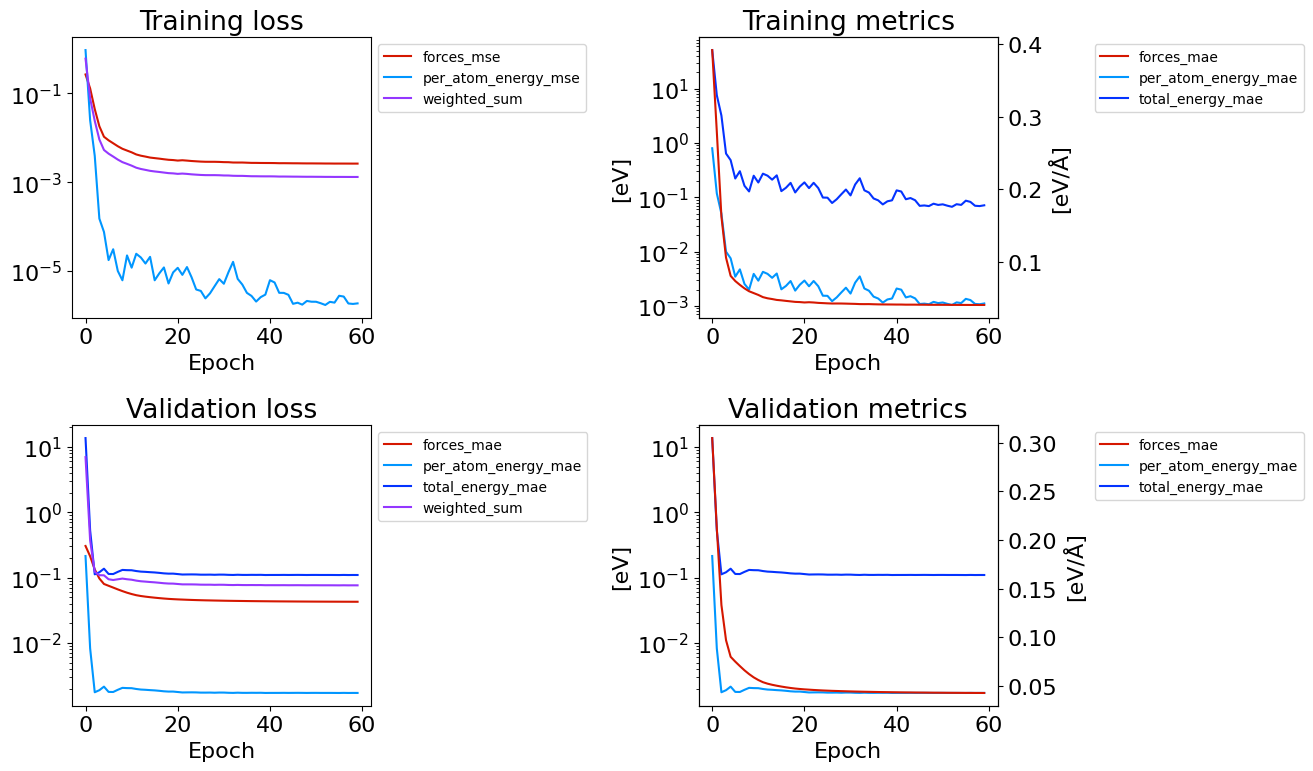

In [ ]:
# @title Plotting training metrics
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
from typing import Literal

colors_dict = {
    "forces_mae": "#d51700",
    "forces_mse": "#d51700",
    # "forces_rmse": "#9437ff",
    "per_atom_energy_mae": "#0096ff",
    "per_atom_energy_mse": "#0096ff",
    # "per_atom_energy_rmse": "#0096ff",
    "total_energy_mae": "#0433ff",
    "total_energy_mse": "#0433ff",
    # "total_energy_rmse": "red",
    "weighted_sum": "#9437ff",
}

def get_metrics(df,
                group: Literal["train", "val"] = "train",
                type: Literal["loss", "metric"] = "metric"):

    if group == "train":
        column_names = [column for column in df.columns if
                        all(["epoch" in column, group in column, type in column])]
    else:
        column_names = [column for column in df.columns if
                        all(["epoch" in column, group in column])]
    columns_to_keep = ["epoch"] + column_names
    df = df[columns_to_keep]
    df = df.dropna(axis=0, subset=column_names)
    renamed_columns = {column: column.split("/")[-1] for column in column_names}
    df = df.rename(columns=renamed_columns)
    return df, renamed_columns.values()

def plot_metric_in_ax(ax, df,
                 group: Literal["train", "val"] = "train",
                 type: Literal["loss", "metric"] = "metric"):
    group_names={"train": "Training", "val": "Validation", "test": "Testing"}
    type_names={"loss": "loss", "metric": "metrics"}
    df, metric_names= get_metrics(df, group=group, type=type)
    lines, labels = [], []
    if type=="metric":
      ax2 = ax.twinx()
      legend_x = 1.3
      for metric in metric_names:
        label = metric.split("/")[0]
        if label not in colors_dict:
          continue
        if "weighted" in metric:
          continue
        if "force" in metric:
          line, = ax2.plot(df["epoch"], df[metric], color=colors_dict[label])
        else:
          line, = ax.plot(df["epoch"], df[metric], color=colors_dict[label])
        lines.append(line)
        labels.append(label)
      ax.set_ylabel("[eV]")
      ax2.set_ylabel("[eV/Å]")
    else:
      legend_x = 1.0
      for metric in metric_names:
        label = metric.split("/")[0]
        if label not in colors_dict:
          continue
        line, = ax.plot(df["epoch"], df[metric], color=colors_dict[label])
        lines.append(line)
        labels.append(label)
    ax.legend(lines, labels, bbox_to_anchor=(legend_x, 1), loc='upper left', fontsize=10)

    # log axis:
    ax.set_yscale("log")
    ax.set_xlabel("Epoch")
    # ax.set_ylabel(f"{group_names[group]} {type_names[type]}")
    ax.set_title(f"{group_names[group]} {type_names[type]}")

def plot_metrics(df):
    fig, ax = plt.subplots(2, 2, figsize=(14, 8))
    plot_metric_in_ax(ax[0,0], df, group='train', type="loss")
    plot_metric_in_ax(ax[0,1], df, group='train', type="metric")
    plot_metric_in_ax(ax[1,0], df, group='val', type="loss")
    plot_metric_in_ax(ax[1,1], df, group='val', type="metric")
    plt.tight_layout()
    plt.show()

metrics_path = "/content/results/tutorial_log/version_0/metrics.csv"
metrics_df = pd.read_csv(metrics_path)

plot_metrics(metrics_df)

We see that the model has converged to an accuarcy of ~1meV/atom on total energy and a force accuracy of ~38 meV/Å on the test set in 3 minutes and trained on only 50 samples. Given the high temperature of the reference data, we are happy with this error and this should give us a good first potential. Note that these numbers will decrease further if you increase the network size, the training set size, and/or the number of epochs to train. We use a simple example here for illustrative purposes.

In [ ]:
# @title Distributing Your Model with nequip-package
%%html
<div style="background-color:#ffffff; border-left:0px solid #3C82E3; border-radius:5px; padding:0px; margin-bottom:20px; font-size:1.1rem; color:#333;">
  <h2 style="margin-top:0; font-size:2rem; color:#3C82E3;"> <code>nequip-package</code>: Saving more than your checkpoint files</h2>
  <p style="margin-bottom:10px;">
    The recommended way to work with and share your trained <b><code>NequIP</b></code> models is through <code>nequip-package</code>. This command creates a zip file that saves not only the model and its weights but also all the code files, configuration, and dependencies required to ensure the model can be rebuilt and retrained. This guarantees that the model can be reinstantiated later for fine-tuning, for example, while remaining independent of any future changes to the <b><code>NequIP</b></code> architecture. This is also the main way in which the model can be further compiled to be used for inference.
  </p>
  <p style="margin-bottom:10px;">
    A <b><code>NequIP</b></code> potential can be generated from a package file using the command <code>nequip-compile PACKAGE_PATH [...]</code>. Additionally, the model can be reinstantiated in a Python environment using the method <code>nequip.model.from_save.ModelFromPackage</code>. Check out the <a href="https://nequip.readthedocs.io/en/latest/guide/getting-started/workflow.html#packaging" target="_blank" style="color: #3C82E3; text-decoration: none;">documentation</a> for more details.
  </p>
</div>

In [ ]:
!nequip-package build /content/results/best.ckpt /content/packaged_model.nequip.zip

[2025-12-02 01:40:40,110][nequip.utils.versions.package_versions][INFO] - [rank: 0] Version Information:
[2025-12-02 01:40:40,110][nequip.utils.versions.package_versions][INFO] - [rank: 0] torch 2.9.0+cu126
[2025-12-02 01:40:40,110][nequip.utils.versions.package_versions][INFO] - [rank: 0] e3nn 0.5.8
[2025-12-02 01:40:40,110][nequip.utils.versions.package_versions][INFO] - [rank: 0] nequip 0.16.1
[2025-12-02 01:40:40,128][nequip.scripts.package][INFO] - [rank: 0] Building `eager` model for packaging ...
[2025-12-02 01:40:40,128][nequip.model.saved_models.load_utils][INFO] - [rank: 0] Loading model from /content/results/best.ckpt ...
[2025-12-02 01:40:40,128][nequip.model.saved_models.checkpoint][INFO] - [rank: 0] Loading model from checkpoint file: /content/results/best.ckpt ...
[2025-12-02 01:40:41,124][nequip.train.ema][INFO] - [rank: 0] Loading EMA weights for evaluation model.
[2025-12-02 01:40:41,153][nequip.data.datamodule._base_datamodule][INFO] - [rank: 0] Found 1 training data

In [ ]:
# @title Deploying the Model with `nequip-compile`
%%html
<div style="background-color:#ffffff; border-left:0px solid #3C82E3; border-radius:5px; padding:0px; margin-bottom:0px; font-size:1.1rem; color:#333;">
  <h2 style="margin-top:0; font-size:2rem; color:#3C82E3;">Deploying the Model with <code>nequip-compile</code></h2>
  <p style="margin-bottom:10px;">
    We convert the model into a potential file using the command <code>nequip-compile</code>, using the package file we just created. This makes the model independent of the <b><code>NequIP</b></code> code, allowing it to be used in any downstream C++ application, such as running MD with <b><code>LAMMPS</b></code>. You can now call this standalone file without requiring the <b><code>NequIP</b></code> Python package to be installed.
  </p>
  <p style="margin-bottom:10px;">
    Here, we compile the model using PyTorch's latest <a href="https://docs.pytorch.org/docs/stable/torch.compiler_aot_inductor.html" target="_blank" style="color:#3C82E3; text-decoration:none;">AOTInductor</a>. For that, make sure to use the flag <code>--mode aotinductor</code> and ensure that the output file has the extension <code>.nequip.pt2</code>. For more information, see <code>nequip-compile --help</code>. As we are testing out both LAMMPS and ASE integrations, we create two compiled models with <code>--target pair_nequip</code> and <code>--target ase</code>, respectively.
  </p>
</div>

In [ ]:
package_path = "/content/packaged_model.nequip.zip"
output_path = "/content/deployed.nequip.pt2"
ase_output_path = "/content/deployed_ase.nequip.pt2"

!nequip-compile --mode aotinductor --device cuda --target pair_nequip {package_path} {output_path}
!nequip-compile --mode aotinductor --device cuda --target ase {package_path} {ase_output_path}

[2025-12-02 01:41:36,976][nequip.scripts.compile][INFO] - [rank: 0] Compiling for device: cuda
[2025-12-02 01:41:36,976][nequip.model.saved_models.load_utils][INFO] - [rank: 0] Loading model from /content/packaged_model.nequip.zip ...
[2025-12-02 01:41:36,976][nequip.model.saved_models.package][INFO] - [rank: 0] Loading model from package file: /content/packaged_model.nequip.zip ...
/usr/local/lib/python3.12/dist-packages/torch/backends/cuda/__init__.py:131: UserWarning: Please use the new API settings to control TF32 behavior, such as torch.backends.cudnn.conv.fp32_precision = 'tf32' or torch.backends.cuda.matmul.fp32_precision = 'ieee'. Old settings, e.g, torch.backends.cuda.matmul.allow_tf32 = True, torch.backends.cudnn.allow_tf32 = True, allowTF32CuDNN() and allowTF32CuBLAS() will be deprecated after Pytorch 2.9. Please see https://pytorch.org/docs/main/notes/cuda.html#tensorfloat-32-tf32-on-ampere-and-later-devices (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:80.)
 

In [ ]:
# @title Running MD with LAMMPS
%%html
<div style="background-color:#ffffff; border-left:0px solid #3C82E3; border-radius:5px; padding:0px; margin-bottom:0px; font-size:1.1rem; color:#333;">
  <h2 style="margin-top:0; font-size:2rem; color:#3C82E3;">Running MD with LAMMPS</h2>
  <p style="margin-bottom:10px;">
    We are now in a position to run MD with our new machine learning potential. Let's start from the initial structure from the training dataset, create the <b><code>LAMMPS</b></code> input file, and run MD for 5 ps at T=300K.
  </p>
  <p style="margin-bottom:10px;">
    Note that <b><code>NequIP</b></code> will learn energies and forces in whatever units your reference data are in. As a result, you will want to set the corresponding units in <b><code>LAMMPS</b></code>. Here, our reference data were in Å, eV, and eV/Å for positions, energies, and forces, respectively, so we have used <code>units metal</code>. This will obviously change if your reference data are in kcal/mol or Hartree, for example.
  </p>
  <p style="margin-bottom:10px;">
    In <b><code>LAMMPS</b></code>, we've installed its interface to <b><code>NequIP</b></code>, known as <b><code>pair-nequip</code></b>, and can now call the <code>pair_style nequip</code>. The output will print some general <b><code>LAMMPS</b></code> output (number of atoms, number of threads, etc.), but it will also log the device <b><code>NequIP</b></code> is using and the type mapping. It's usually a good idea to check that this matches what you'd expect.
  </p>
</div>

In [ ]:
# @title Prepare files and run LAMMPS
from ase.io import read, write
example_atoms = read('./sitraj.xyz', index=0)
write('./si.data', example_atoms, format='lammps-data')

lammps_input = """
units	metal
atom_style atomic
dimension 3

# set newton on for pair_allegro (off for pair_nequip)
newton off
boundary p p p
read_data ../si.data

# if you want to run a larger system, simply replicate the system in space
# replicate 3 3 3

# nequip pair style
pair_style	nequip
pair_coeff	* * /content/deployed.nequip.pt2 Si

mass 1 28.0855

velocity all create 300.0 1234567 loop geom

neighbor 1.0 bin
neigh_modify delay 5 every 1

timestep 0.001
thermo 10

dump dump_pos all custom 200 dump.xyz id type x y z

# nose-hoover thermostat, 300K
fix  1 all nvt temp 300 300 $(100*dt)

# compute rdf and average after some equilibration
comm_modify cutoff 7.0
compute rdfall all rdf 1000 cutoff 5.0
fix 2 all ave/time 1 2500 5000 c_rdfall[*] file si.rdf mode vector

# run 5ps
run 5000
"""
!rm -rf ./lammps_run
!mkdir lammps_run
with open("lammps_run/si_rdf.in", "w") as f:
    f.write(lammps_input)

!cd lammps_run/ && ../lammps/build/lmp -in si_rdf.in

LAMMPS (10 Sep 2025 - Development - fac62e9-modified)
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread.
  using 1 OpenMP thread(s) per MPI task
Reading data file ...
  orthogonal box = (0 0 0) to (10.862 10.862 10.862)
  1 by 1 by 1 MPI processor grid
  reading atoms ...
  64 atoms
  read_data CPU = 0.004 seconds
NequIP/Allegro is using input precision d and output precision d
NequIP/Allegro: Loading model from /content/deployed.nequip.pt2
[W1201 17:01:44.491367426 Context.cpp:80] Warning: Please use the new API settings to control TF32 behavior, such as torch.backends.cudnn.conv.fp32_precision = 'tf32' or torch.backends.cuda.matmul.fp32_precision = 'ieee'. Old settings, e.g, torch.backends.cuda.matmul.allow_tf32 = True, torch.backends.cudnn.allow_tf32 = True, allowTF32CuDNN() and allowTF32CuBLAS() will be deprecated after Pytorch 2.9. Please see https://pytorch.org/docs/main/notes/cuda.html#tensorfloat-32-tf32-on-ampere-and-later-devices (function operator())
Type mappin

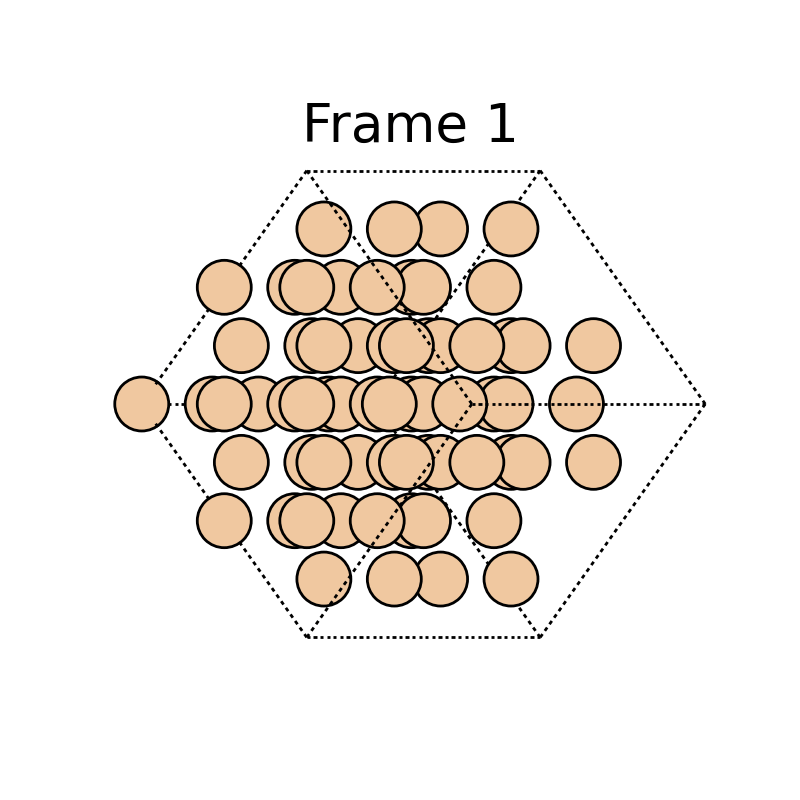

In [ ]:
# @title Plotting trajectory animation
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from ase.io import read
from ase.visualize.plot import plot_atoms

# Path to your uploaded .xyz file
xyz_file = '/content/lammps_run/dump.xyz'   # Replace with the name of your uploaded file

# Read all frames from the .xyz file
atoms_list = read(xyz_file, index=":")  # Load all frames
for atoms in atoms_list:
    atoms.set_chemical_symbols('64Si')

# Create a figure for the animation
fig, ax = plt.subplots(figsize=(4, 4))

def update(frame):
    """Update function for animation."""
    ax.clear()  # Clear the previous frame
    plot_atoms(atoms_list[frame], ax, radii=0.8, rotation=('45x, 45y, 0z'))
    ax.set_title(f"Frame {frame + 1}")
    ax.axis("off")  # Hide axes for cleaner visualization
plt.close()

# Create the animation
ani = FuncAnimation(fig, update, frames=len(atoms_list), interval=200)  # 200ms per frame

ani.save("ani.gif", writer="pillow", dpi=200, fps=60)

from IPython.display import Image
Image(open('ani.gif','rb').read())

**Plotting the results:**

  Finally, we'll plot the RDF. We see that we recover the Si-Si bond length of 0.235 nm quite nicely.

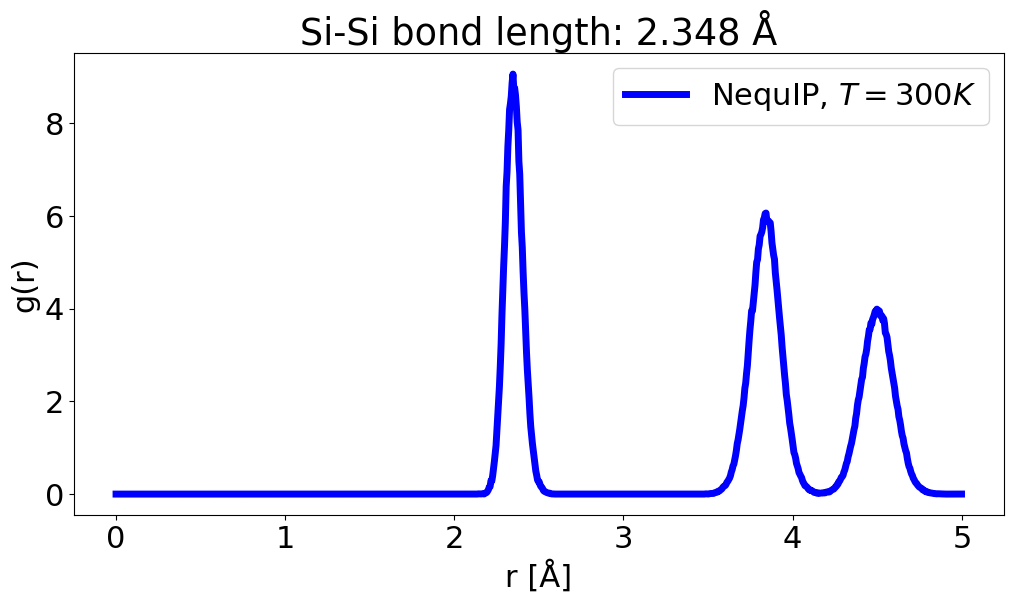

In [ ]:
#@title Plotting RDF
# Python imports and pre-definitions
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['font.size'] = 22

def parse_lammps_rdf(rdffile):
    """Parse the RDF file written by LAMMPS
    copied from Boris' class code: https://github.com/bkoz37/labutil
    """
    with open(rdffile, 'r') as rdfout:
        rdfs = []; buffer = []
        for line in rdfout:
            values = line.split()
            if line.startswith('#'):
                continue
            elif len(values) == 2:
                nbins = values[1]
            else:
                buffer.append([float(values[1]), float(values[2])])
                if len(buffer) == int(nbins):
                    frame = np.transpose(np.array(buffer))
                    rdfs.append(frame)
                    buffer = []
    return rdfs

rdf = parse_lammps_rdf('/content/lammps_run/si.rdf')
plt.figure(figsize=(12, 6))
plt.plot(rdf[0][0], rdf[0][1], 'b', linewidth=5, label="NequIP, $T=300K$")
plt.xlabel('r [Å]')
plt.ylabel('g(r)')
plt.title("Si-Si bond length: {:.3f} Å".format(rdf[0][0][np.argmax(rdf[0][1])]))
plt.legend(loc='upper right')
plt.show()

In [ ]:
# @title ASE NequIP Calculator
%%html
<div style="background-color:#ffffff; border-left:0px solid #3C82E3; border-radius:5px; padding:0px; margin-bottom:20px; font-size:1.1rem; color:#333;">
  <h2 style="margin-top:0; font-size:2rem; color:#3C82E3;"> ASE NequIP Calculator </code></h2>
  <p style="margin-bottom:10px;">
    Once a <b><code>NequIP</code></b> model has been trained, it can be used to create an <b><code>ASE</b></code> calculator that can calculate things like energy and forces. An <b><code>ASE</b></code> calculator can be created from a <code>.pth</code> or <code>.pt2</code> file (generated with <code>nequip-compile</code>). Please see the Python API for more details.
  <p style="margin-bottom:10px;">
    To create an <b><code>ASE</b></code> Calculator from the trained <b><code>NequIP</b></code> model from a checkpoint file:
    <br>
    <br>
    <code> calculator = NequIPCalculator.from_compiled_model( <br>
      &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; compile_path="/content/deployed_ase.nequip.pt2", <br>
       &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;                                             chemical_species_to_atom_type_map = {'Si':'Si'}, <br>
                                        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;            device='gpu')</code>
  </p>
  <p style="margin-bottom:10px;">
    The calculator can then be used to compute energies and forces for a energy volume curve for example.

  </p>
</div>

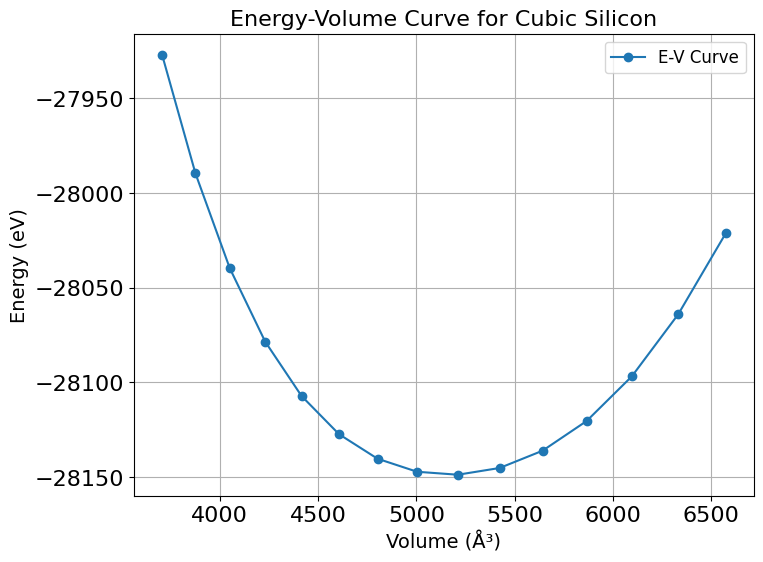

In [ ]:
#@title Using ASE NequIP calculator to plot energy-volume curve
from ase import Atoms
from ase.build import bulk
import numpy as np
import matplotlib.pyplot as plt
from nequip.ase import NequIPCalculator

# Initialize the nequip calculator
calculator = NequIPCalculator.from_compiled_model(compile_path="/content/deployed_ase.nequip.pt2",
                                                    chemical_species_to_atom_type_map = {'Si':'Si'},
                                                    device='cuda' )


# Range of scaling factors for lattice constant
scaling_factors = np.linspace(0.95, 1.15, 15)
volumes = []
energies = []

# Loop through scaling factors, calculate energy, and collect volumes and energies
for scale in scaling_factors:

    # Generate the cubic silicon structure with 216 atoms
    scaled_si = bulk("Si", crystalstructure="diamond", a=5.43 * scale, cubic=True)
    scaled_si *= (3, 3, 3)  # Make a supercell (3x3x3) to get 216 atoms
    scaled_si.calc = calculator

    volume = scaled_si.get_volume()
    energy = scaled_si.get_potential_energy()
    volumes.append(volume)
    energies.append(energy)

# Plot the energy-volume curve
plt.figure(figsize=(8, 6))
plt.plot(volumes, energies, marker='o', label="E-V Curve")
plt.xlabel("Volume (Å³)", fontsize=14)
plt.ylabel("Energy (eV)", fontsize=14)
plt.title("Energy-Volume Curve for Cubic Silicon", fontsize=16)
plt.legend(fontsize=12)
plt.grid()
plt.show()


In [ ]:
# @title   .
%%html
<div style="background-color:#ffffff; border-left:0px solid #3C82E3; border-radius:5px; padding:0px; margin-bottom:20px; font-size:1.1rem; color:#333;">
  <h2 style="margin-top:0; font-size:2rem; color:#3C82E3;"> Using foundation models </code></h2>
</div>

Instead of training a model from scratch, we can use a foundation model to generate a potential. The NequIP team is working on a full suite of foundation models and tools to make them easy to use. Our latest models are available to download at https://www.nequip.net. You can also compile them in your machine using a simple command (available in the website for each of the models you choose). Here is an example using the latest NequIP foundation model trained on OMat24, MPTraj and Alexandria (more info [here](https://matbench-discovery.materialsproject.org/models/nequip-OAM-L-0.1)).

```bash
nequip-compile \
  nequip.net:mir-group/NequIP-OAM-L:0.1 \
  mir-group__NequIP-OAM-L__0.1.nequip.pt2 \
  --mode aotinductor \
  --device cuda \
  --target ase
```


In [ ]:
!nequip-compile nequip.net:mir-group/NequIP-OAM-L:0.1 mir-group__NequIP-OAM-L__0.1.nequip.pt2 --mode aotinductor --device cuda --target ase

[2025-12-02 01:51:45,330][nequip.scripts.compile][INFO] - [rank: 0] Compiling for device: cuda
[2025-12-02 01:51:45,331][nequip.model.saved_models.load_utils][INFO] - [rank: 0] Fetching mir-group/NequIP-OAM-L:0.1 from nequip.net...
[2025-12-02 01:51:58,466][nequip.utils.model_cache][INFO] - [rank: 0] Model cached to /root/.nequip/model_cache/4e0b4d6634fcfe03d1c778ab16952faab861aa2564052c42f3674153c6dd1bea.nequip.zip
[2025-12-02 01:51:58,467][nequip.model.saved_models.load_utils][INFO] - [rank: 0] Download complete, loading model...
[2025-12-02 01:51:58,467][nequip.model.saved_models.package][INFO] - [rank: 0] Loading model from package file: /root/.nequip/model_cache/4e0b4d6634fcfe03d1c778ab16952faab861aa2564052c42f3674153c6dd1bea.nequip.zip ...
/usr/local/lib/python3.12/dist-packages/torch/backends/cuda/__init__.py:131: UserWarning: Please use the new API settings to control TF32 behavior, such as torch.backends.cudnn.conv.fp32_precision = 'tf32' or torch.backends.cuda.matmul.fp32_pre

Now let's compare the energy vs. lattice parameter curves from the foundation model and the toy model trained here:

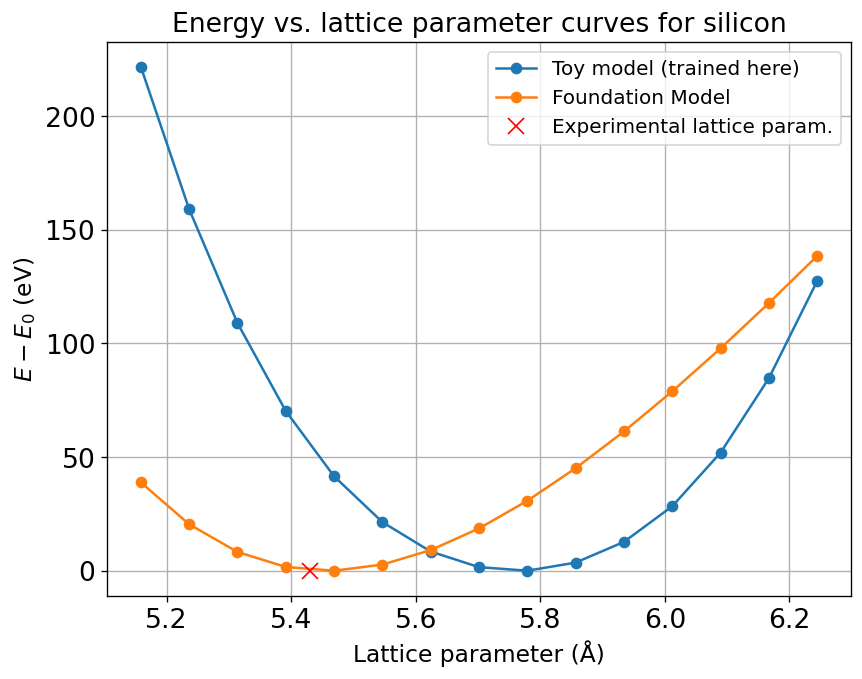

In [ ]:
#@title Running the foundation model ASE calculator

fm_calculator = NequIPCalculator.from_compiled_model(
    compile_path="/content/mir-group__NequIP-OAM-L__0.1.nequip.pt2",
    chemical_species_to_atom_type_map = {'Si':'Si'},
    device='cuda' )

scaling_factors = np.linspace(0.95, 1.15, 15)
fm_energies = []
energies = []
lattice_constants = []
for scale in scaling_factors:
    scaled_si = bulk("Si", crystalstructure="diamond", a=5.43 * scale, cubic=True)
    scaled_si *= (3, 3, 3)  # Make a supercell (3x3x3) to get 216 atoms
    scaled_si.calc = fm_calculator
    fm_energies.append(scaled_si.get_potential_energy())
    scaled_si.calc = calculator
    energies.append(scaled_si.get_potential_energy())
    lattice_constants.append(
        scaled_si.cell.lengths()[0]/3
    )


plt.figure(figsize=(8, 6), dpi=120)
plt.plot(lattice_constants, energies-min(energies), marker='o',
         label="Toy model (trained here)")
plt.plot(lattice_constants, fm_energies-min(fm_energies), marker='o',
         label="Foundation Model")
plt.plot(5.43, 0, 'x', color='red',
         markersize=10, label="Experimental lattice param.")
# plt.xlabel("Volume (Å³)", fontsize=14)
plt.xlabel("Lattice parameter (Å)", fontsize=14)
plt.ylabel("$E - E_0$ (eV)", fontsize=14)
plt.title("Energy vs. lattice parameter curves for silicon", fontsize=16)
plt.legend(fontsize=12)
plt.grid()
plt.show()


We can see that the foundation model is more accurate in reproducing the experimental value of lattice constant of FCC Si (5.43 Å). In this case, the problem lies on the training data we have used to train the initial model.

For demonstration purposes, let's assume that our training data is the ground truth in this case. What we could do then would be to fine-tune our foundation model to our data by tunning its weights for just a few epochs (much fewer than what is required to train the model from scratch). This is shown in the section below.

# Fine-tuning foundation models

Let's fine-tune our foundation model to our specific dataset.

Here, we can simply download the package file of the foundation model (available [here](https://www.nequip.net/models/mir-group/NequIP-OAM-L:0.1)) and retrain the model using a lower learning rate.

In this case, instead of instantiating a new model on the config file, we simply have to load the existing model's package file by using the following in our config file:

```yaml
model:
  _target_: nequip.model.ModelFromPackage
  package_path: path/to/model.nequip.zip
```

Check the [NequIP documentation](https://nequip.readthedocs.io/en/latest/guide/training-techniques/fine_tuning.html) for a full guide on fine-tunning.

In [ ]:
!wget --quiet https://github.com/mir-group/nequip-tutorial/raw/refs/heads/main/config_finetuning.yaml
!wget https://zenodo.org/records/16980200/files/NequIP-OAM-L-0.1.nequip.zip

--2025-12-02 02:28:22--  https://zenodo.org/records/16980200/files/NequIP-OAM-L-0.1.nequip.zip
Resolving zenodo.org (zenodo.org)... 137.138.52.235, 188.185.48.75, 188.185.43.153, ...
Connecting to zenodo.org (zenodo.org)|137.138.52.235|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 78473421 (75M) [application/octet-stream]
Saving to: ‘NequIP-OAM-L-0.1.nequip.zip.1’

NequIP-OAM-L-0.1.ne 100%[===================>]  74.84M  5.68MB/s    in 13s     

2025-12-02 02:28:36 (5.63 MB/s) - ‘NequIP-OAM-L-0.1.nequip.zip.1’ saved [78473421/78473421]



In [ ]:
!rm -rf ./results_ft
!mkdir ./results_ft
!nequip-train -cn config_finetuning.yaml

[2025-12-02 02:29:06,013][nequip.utils.versions.package_versions][INFO] - [rank: 0] Version Information:
[2025-12-02 02:29:06,014][nequip.utils.versions.package_versions][INFO] - [rank: 0] torch 2.9.0+cu126
[2025-12-02 02:29:06,014][nequip.utils.versions.package_versions][INFO] - [rank: 0] e3nn 0.5.8
[2025-12-02 02:29:06,014][nequip.utils.versions.package_versions][INFO] - [rank: 0] nequip 0.16.1
[2025-12-02 02:29:06,014][nequip.scripts.train][INFO] - [rank: 0] This `nequip-train` run will perform the following tasks: ['train', 'test']
[2025-12-02 02:29:06,014][nequip.scripts.train][INFO] - [rank: 0] and use the output directory provided by Hydra: /content/outputs/2025-12-02/02-29-05
[2025-12-02 02:29:06,032][nequip.scripts.train][INFO] - [rank: 0] Building datamodule ...
[2025-12-02 02:29:06,099][nequip.data.datamodule._base_datamodule][INFO] - [rank: 0] Found 1 training dataset(s), 1 validation dataset(s), 1 test dataset(s), and 0 predict dataset(s).
GPU available: True (cuda), used:

In [ ]:
#@title Compiling the fine-tuned model
ckpt_path = "/content/results/best.ckpt"
ase_output_path = "/content/finetuned_ase.nequip.pt2"
!nequip-compile --mode aotinductor --device cuda --target ase {ckpt_path} {ase_output_path}

[2025-12-02 02:34:30,109][nequip.scripts.compile][INFO] - [rank: 0] Compiling for device: cuda
[2025-12-02 02:34:30,109][nequip.model.saved_models.load_utils][INFO] - [rank: 0] Loading model from /content/results/best.ckpt ...
[2025-12-02 02:34:30,109][nequip.model.saved_models.checkpoint][INFO] - [rank: 0] Loading model from checkpoint file: /content/results/best.ckpt ...
[2025-12-02 02:34:30,985][nequip.train.ema][INFO] - [rank: 0] Loading EMA weights for evaluation model.
[2025-12-02 02:34:31,004][nequip.data.datamodule._base_datamodule][INFO] - [rank: 0] Found 1 training dataset(s), 1 validation dataset(s), 1 test dataset(s), and 0 predict dataset(s).
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader 

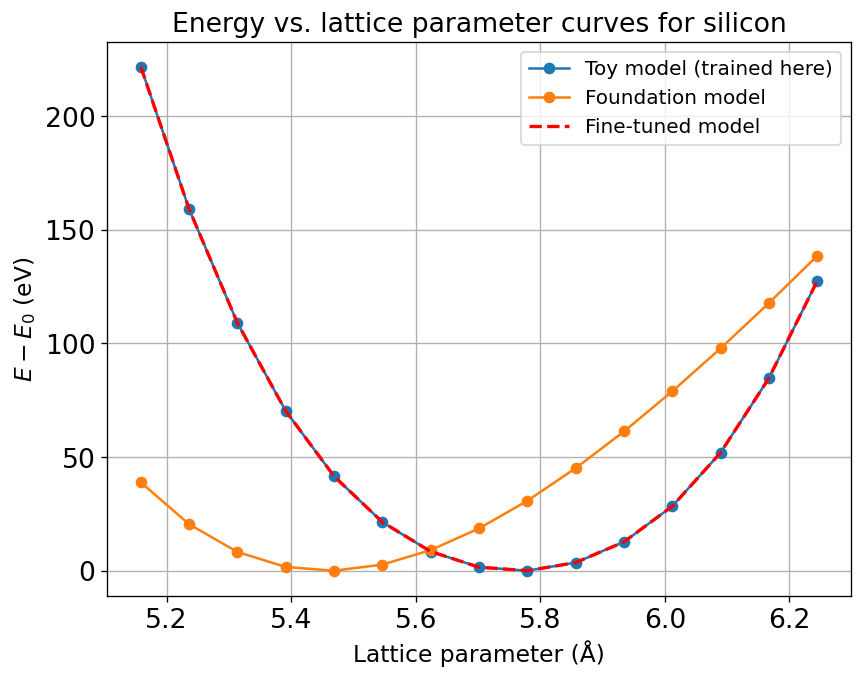

In [ ]:
#@title Running the foundation model ASE calculator

ft_calculator = NequIPCalculator.from_compiled_model(
    compile_path=ase_output_path,
    chemical_species_to_atom_type_map = {'Si':'Si'},
    device='cuda' )

ft_energies = []
for scale in scaling_factors:
    scaled_si = bulk("Si", crystalstructure="diamond", a=5.43 * scale, cubic=True)
    scaled_si *= (3, 3, 3)  # Make a supercell (3x3x3) to get 216 atoms
    scaled_si.calc = ft_calculator
    ft_energies.append(scaled_si.get_potential_energy())

plt.figure(figsize=(8, 6), dpi=120)
plt.plot(lattice_constants, energies-min(energies), marker='o',
         label="Toy model (trained here)")
plt.plot(lattice_constants, fm_energies-min(fm_energies), marker='o',
         label="Foundation model")
plt.plot(lattice_constants, ft_energies-min(ft_energies), '--', color='red',
         linewidth=2, label="Fine-tuned model")
# plt.plot(5.43, 0, 'x', color='red',
#          markersize=10, label="Experimental lattice param.")
plt.xlabel("Lattice parameter (Å)", fontsize=14)
plt.ylabel("$E - E_0$ (eV)", fontsize=14)
plt.title("Energy vs. lattice parameter curves for silicon", fontsize=16)
plt.legend(fontsize=12)
plt.grid()
plt.savefig("finetuned_comparison.png", dpi=300)
plt.show()


We can see that we have shifted the predictions of the foundation model to our training data by fine-tuning it. The advantage of this method is that, in most cases, only a fraction of data and training time is needed to achieve comparable accuracies in a fine-tuned model in comparison to training it from scratch.